In [ ]:
!git clone https://github.com/Morteza-24/SelfBlendedImages.git
!pip install efficientnet-pytorch retinaface-pytorch

Cloning into 'SelfBlendedImages'...
remote: Enumerating objects: 87, done.
remote: Counting objects: 100% (44/44), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 87 (delta 29), reused 27 (delta 26), pack-reused 43 (from 1)
Receiving objects: 100% (87/87), 1.54 MiB | 4.12 MiB/s, done.
Resolving deltas: 100% (36/36), done.
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of retinaface-pytorch to determine which version is compatible with other requirements. This could take a while.
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.5/64.5 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 54.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 51.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp drive/MyDrive/FFc23.tar ./
!mkdir -p test_data/real
!mkdir -p test_data/fake

In [ ]:
import os, cv2
import numpy as np

rng = np.random.default_rng()

def sample_frames_from_videos(src, dst, num_frames=3):
  vids = os.listdir(src)
  for vid in vids:
    cap = cv2.VideoCapture(src+vid)
    length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    frames = sorted(set(rng.choice(length-2, size=num_frames, replace=False)))
    for frame in frames:
      cap.set(cv2.CAP_PROP_POS_FRAMES, frame)
      _, img = cap.read()
      cv2.imwrite(dst+f'{vid}_{frame}.jpg', img)

In [ ]:
sample_frames_from_videos('drive/MyDrive/CELEBDF_V2/Real/', 'test_data/real/C_')
sample_frames_from_videos('drive/MyDrive/CELEBDF_V2/Fake/', 'test_data/fake/C_')
# sample_frames_from_videos('drive/MyDrive/DeeperForensicsV1/source_videos/', 'test_data/real/D_')
# sample_frames_from_videos('drive/MyDrive/DeeperForensicsV1/manipulated_videos/end_to_end/', 'test_data/fake/D_l0_')
# sample_frames_from_videos('drive/MyDrive/DeeperForensicsV1/manipulated_videos/end_to_end_level_1/', 'test_data/fake/D_l1_')
# sample_frames_from_videos('drive/MyDrive/DeeperForensicsV1/manipulated_videos/end_to_end_level_2/', 'test_data/fake/D_l2_')

In [ ]:
!ls -1 test_data/real/ | wc -l
!ls -1 test_data/fake/ | wc -l

120
186


In [ ]:
!for f in $(ls -1 test_data/real/);\
do CUDA_VISIBLE_DEVICES='0' python3 SelfBlendedImages/src/inference/inference_image.py -w FFc23.tar -i test_data/real/"$f";\
done > real_results.txt

/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.16 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.16 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.16 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/usr/local/lib/python3.10/dist-packages/

In [ ]:
!for f in $(ls -1 test_data/fake/);\
do CUDA_VISIBLE_DEVICES='0' python3 SelfBlendedImages/src/inference/inference_image.py -w FFc23.tar -i test_data/fake/"$f";\
done > fake_results.txt

/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.16 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.16 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.16 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/usr/local/lib/python3.10/dist-packages/

In [ ]:
y_true = []
y_pred = []
with open("real_results.txt", "r") as f:
  lines = f.readlines()
  for line in lines:
    if line.startswith("fakeness:"):
      prob = float(line.split(" ")[1][:-1])
      y_pred.append(prob)
      y_true.append(0)
with open("fake_results.txt", "r") as f:
  lines = f.readlines()
  for line in lines:
    if line.startswith("fakeness:"):
      prob = float(line.split(" ")[1][:-1])
      y_pred.append(prob)
      y_true.append(1)
y_true = np.array(y_true)
y_pred = np.array(y_pred)

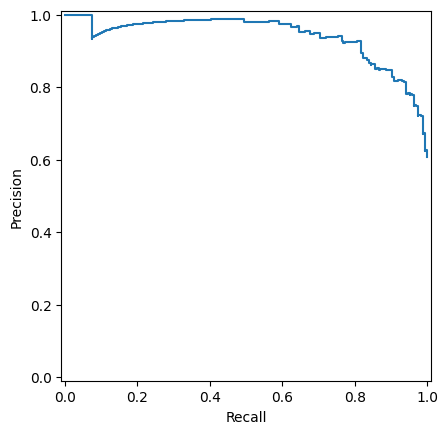

threshold: 0.4862
f-score: 0.875
precision: 0.9032258064516129
recall: 0.8484848484848485
accuracy: 0.8398692810457516


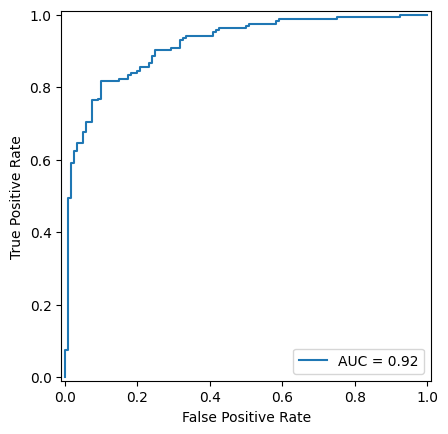

threshold: 0.7172
accuracy: 0.8464052287581699
MCC: 0.6965628607539528


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import (precision_recall_curve, accuracy_score,
                             confusion_matrix, roc_auc_score, roc_curve,
                             matthews_corrcoef, auc,
                             RocCurveDisplay, PrecisionRecallDisplay, auc)

precision, recall, thresholds = precision_recall_curve(y_true, y_pred)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.show()
fscore = (2 * precision * recall) / (precision + recall)
ix = np.argmax(fscore)
print("threshold:", thresholds[ix])
print("f-score:", fscore[ix])
print("precision:", recall[ix])
print("recall:", precision[ix])

print("accuracy:", accuracy_score(y_true, y_pred>thresholds[ix]))

fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()
plt.show()

ix = np.argmax(tpr - fpr)
print("threshold:", thresholds[ix])
print("accuracy:", accuracy_score(y_true, y_pred>thresholds[ix]))
print("MCC:", matthews_corrcoef(y_true, y_pred>thresholds[ix]))